In [10]:
import pandas as pd

# import csv
df = pd.read_csv("run_results.csv")
print(df)

# compute summary statistics
grouped = df.groupby("task")["score"]

print(grouped.describe())

  task  seed     score
0  rte     0  0.877256
1  rte     1  0.851986
2  rte     2  0.855596
3  rte     3  0.848375
4  rte     4  0.841155
      count      mean       std       min       25%       50%       75%  \
task                                                                      
rte     5.0  0.854874  0.013604  0.841155  0.848375  0.851986  0.855596   

           max  
task            
rte   0.877256  


/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_80527/3353709225.py:3211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


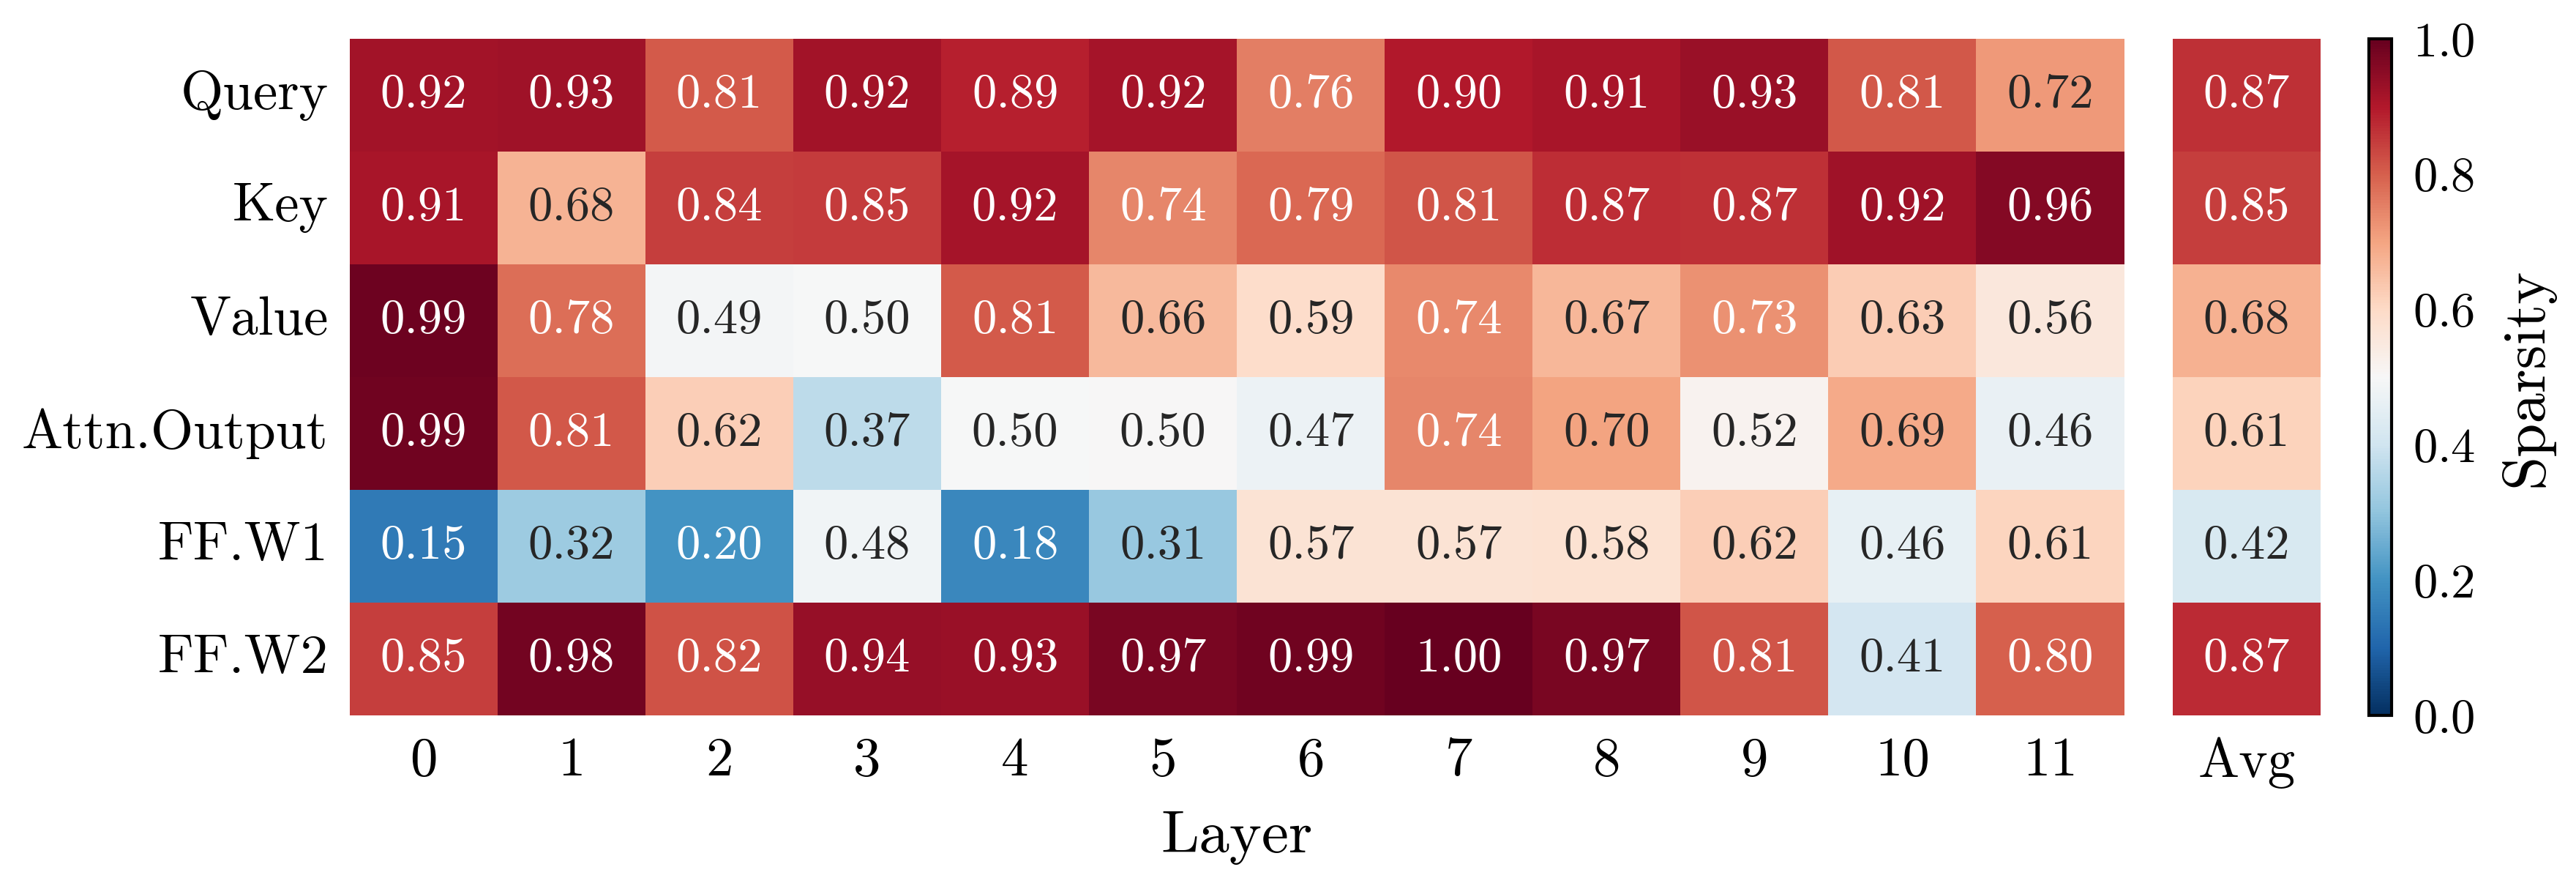

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

run1 = {
  "_runtime": 1378,
  "_step": 5414,
  "_timestamp": 1756929215.5260365,
  "_wandb.runtime": 1378,
  "eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity": 0.9879214763641356,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity": 0.9072265625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity": 0.8994140625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity": 0.98974609375,
  "eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity": 0.14686986804008484,
  "eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity": 0.8707082867622375,
  "eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity": 0.6484375,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity": 0.806396484375,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity": 0.8720703125,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity": 0.8315686583518982,
  "eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity": 0.3723787069320678,
  "eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity": 0.9941920042037964,
  "eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity": 0.53369140625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity": 0.93115234375,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity": 0.478271484375,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity": 0.6159282326698303,
  "eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity": 0.13589638471603394,
  "eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity": 0.3894171416759491,
  "eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity": 0.2588404715061188,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity": 0.923583984375,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity": 0.761962890625,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity": 0.6131527423858643,
  "eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity": 0.5205591917037964,
  "eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity": 0.8712993264198303,
  "eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity": 0.5991982221603394,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity": 0.90283203125,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity": 0.824462890625,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity": 0.5115645527839661,
  "eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity": 0.2464278340339661,
  "eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity": 0.9946032166481018,
  "eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity": 0.38802939653396606,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity": 0.9072265625,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity": 0.890869140625,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity": 0.1455335170030594,
  "eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity": 0.49496299028396606,
  "eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity": 0.9995374083518982,
  "eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity": 0.45271381735801697,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity": 0.815185546875,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity": 0.993408203125,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity": 0.5829564332962036,
  "eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity": 0.1308850795030594,
  "eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity": 0.9996402263641356,
  "eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity": 0.6355366110801697,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity": 0.68603515625,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity": 0.904052734375,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity": 0.6299085021018982,
  "eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity": 0.48625102639198303,
  "eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity": 0.9976357221603394,
  "eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity": 0.4105931222438812,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity": 0.881591796875,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity": 0.808837890625,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity": 0.5909745097160339,
  "eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity": 0.3720189034938812,
  "eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity": 0.9999486207962036,
  "eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity": 0.5180920958518982,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity": 0.8994140625,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity": 0.8828125,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity": 0.8709395527839661,
  "eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity": 0.3818359375,
  "eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity": 0.9992290139198304,
  "eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity": 0.2763414978981018,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity": 0.752685546875,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity": 0.86376953125,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity": 0.7018914818763733,
  "eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity": 0.5961143374443054,
  "eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity": 0.7706876993179321,
  "eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity": 0.6045435667037964,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity": 0.78955078125,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity": 0.970458984375,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity": 0.6746504902839661,
  "eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity": 0.4665912985801697,
  "eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity": 0.7765727639198303,
  "eval/base_model.model.pooler.dense/sparsity": 0.32894736528396606,
  "eval/loss": 0.9641115665435792,
  "eval/matthews_correlation": 0.6849514557852503,
  "eval/runtime": 3.6,
  "eval/samples_per_second": 289.721,
  "eval/sparsity": 0.681770384311676,
  "eval/steps_per_second": 9.167,
  "gradients/base_model.model.classifier.modules_to_save.default.bias": {
    "_type": "histogram"
  },
  "gradients/base_model.model.classifier.modules_to_save.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.0.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.1.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.10.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.11.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.2.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.3.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.4.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.5.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.6.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.7.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.8.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.deberta.encoder.layer.9.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.pooler.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/base_model.model.pooler.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.output.dense": 0.9874442219734192,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.key_proj": 0.908203125,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.query_proj": 0.89208984375,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.value_proj": 0.9890486001968384,
  "sparsity/base_model.model.deberta.encoder.layer.0.intermediate.dense": 0.1796875149011612,
  "sparsity/base_model.model.deberta.encoder.layer.0.output.dense": 0.8713728189468384,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.output.dense": 0.7068917751312256,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.key_proj": 0.793701171875,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.query_proj": 0.875732421875,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.value_proj": 0.8178013563156128,
  "sparsity/base_model.model.deberta.encoder.layer.1.intermediate.dense": 0.3323800265789032,
  "sparsity/base_model.model.deberta.encoder.layer.1.output.dense": 0.9935128688812256,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.output.dense": 0.632882297039032,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.key_proj": 0.91552734375,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.query_proj": 0.49658203125,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.value_proj": 0.493931382894516,
  "sparsity/base_model.model.deberta.encoder.layer.10.intermediate.dense": 0.208147332072258,
  "sparsity/base_model.model.deberta.encoder.layer.10.output.dense": 0.3847656548023224,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.output.dense": 0.2586495578289032,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.key_proj": 0.918701171875,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.query_proj": 0.74560546875,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.value_proj": 0.5871931314468384,
  "sparsity/base_model.model.deberta.encoder.layer.11.intermediate.dense": 0.593331515789032,
  "sparsity/base_model.model.deberta.encoder.layer.11.output.dense": 0.8733259439468384,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.output.dense": 0.6160017251968384,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.key_proj": 0.89990234375,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.query_proj": 0.817626953125,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.value_proj": 0.6119559407234192,
  "sparsity/base_model.model.deberta.encoder.layer.2.intermediate.dense": 0.2520228922367096,
  "sparsity/base_model.model.deberta.encoder.layer.2.output.dense": 0.9730747938156128,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.output.dense": 0.389927476644516,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.key_proj": 0.901123046875,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.query_proj": 0.875244140625,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.value_proj": 0.1364397406578064,
  "sparsity/base_model.model.deberta.encoder.layer.3.intermediate.dense": 0.4121094048023224,
  "sparsity/base_model.model.deberta.encoder.layer.3.output.dense": 0.9997907876968384,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.output.dense": 0.445591539144516,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.key_proj": 0.80322265625,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.query_proj": 0.982177734375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.value_proj": 0.5578264594078064,
  "sparsity/base_model.model.deberta.encoder.layer.4.intermediate.dense": 0.1017020121216774,
  "sparsity/base_model.model.deberta.encoder.layer.4.output.dense": 0.9996512532234192,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.output.dense": 0.6822684407234192,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.key_proj": 0.660888671875,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.query_proj": 0.891845703125,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.value_proj": 0.6356724500656128,
  "sparsity/base_model.model.deberta.encoder.layer.5.intermediate.dense": 0.4494280219078064,
  "sparsity/base_model.model.deberta.encoder.layer.5.output.dense": 0.985909640789032,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.output.dense": 0.358189195394516,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.key_proj": 0.8740234375,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.query_proj": 0.79541015625,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.value_proj": 0.598214328289032,
  "sparsity/base_model.model.deberta.encoder.layer.6.intermediate.dense": 0.3563755750656128,
  "sparsity/base_model.model.deberta.encoder.layer.6.output.dense": 0.9997907876968384,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.output.dense": 0.5719866156578064,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.key_proj": 0.884033203125,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.query_proj": 0.86083984375,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.value_proj": 0.8378208875656128,
  "sparsity/base_model.model.deberta.encoder.layer.7.intermediate.dense": 0.4033203423023224,
  "sparsity/base_model.model.deberta.encoder.layer.7.output.dense": 0.9993722438812256,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.output.dense": 0.3559570610523224,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.key_proj": 0.754150390625,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.query_proj": 0.86572265625,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.value_proj": 0.6930106282234192,
  "sparsity/base_model.model.deberta.encoder.layer.8.intermediate.dense": 0.650390625,
  "sparsity/base_model.model.deberta.encoder.layer.8.output.dense": 0.8740234971046448,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.output.dense": 0.6337890625,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.key_proj": 0.775390625,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.query_proj": 0.94970703125,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.value_proj": 0.678292453289032,
  "sparsity/base_model.model.deberta.encoder.layer.9.intermediate.dense": 0.4786551594734192,
  "sparsity/base_model.model.deberta.encoder.layer.9.output.dense": 0.7986189126968384,
  "sparsity/base_model.model.pooler.dense": 0.5892857313156128,
  "step": 5360,
  "total_flos": 22851274334085120,
  "train/epoch": 20,
  "train/global_sparsity": 0.6873189210891724,
  "train/global_step": 5360,
  "train/grad_norm": 0.03436105698347092,
  "train/learning_rate": 0.000003632393807066296,
  "train/loss": 0.0177,
  "train_loss": 0.10147083153697982,
  "train_runtime": 1374.2354,
  "train_samples_per_second": 124.447,
  "train_steps_per_second": 3.9
}

run2 = {
  "_runtime": 1367,
  "_step": 5414,
  "_timestamp": 1756930592.3622468,
  "_wandb.runtime": 1367,
  "eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity": 0.9881784319877625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity": 0.8994140625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity": 0.931640625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity": 0.9906198382377625,
  "eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity": 0.13057668507099152,
  "eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity": 0.8234220743179321,
  "eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity": 0.9911595582962036,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity": 0.617919921875,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity": 0.991455078125,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity": 0.7502055764198303,
  "eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity": 0.12906044721603394,
  "eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity": 0.997378706932068,
  "eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity": 0.7399002909660339,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity": 0.96337890625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity": 0.91650390625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity": 0.6311163902282715,
  "eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity": 0.7193410992622375,
  "eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity": 0.3874383270740509,
  "eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity": 0.29335424304008484,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity": 0.98388671875,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity": 0.6796875,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity": 0.4175061583518982,
  "eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity": 0.5124126076698303,
  "eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity": 0.7498201131820679,
  "eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity": 0.7498201131820679,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity": 0.8017578125,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity": 0.755615234375,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity": 0.4116725027561188,
  "eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity": 0.13093647360801697,
  "eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity": 0.8409488201141357,
  "eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity": 0.37435752153396606,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity": 0.9033203125,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity": 0.906982421875,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity": 0.7487407326698303,
  "eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity": 0.4948602020740509,
  "eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity": 0.997378706932068,
  "eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity": 0.4047594666481018,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity": 0.974853515625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity": 0.875244140625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity": 0.9881784319877625,
  "eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity": 0.2521844208240509,
  "eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity": 0.9720908999443054,
  "eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity": 0.5103310346603394,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity": 0.712890625,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity": 0.950439453125,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity": 0.7483809590339661,
  "eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity": 0.16031044721603394,
  "eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity": 0.9995630979537964,
  "eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity": 0.3786749541759491,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity": 0.774658203125,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity": 0.68603515625,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity": 0.6847245097160339,
  "eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity": 0.73388671875,
  "eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity": 0.999331831932068,
  "eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity": 0.9926244020462036,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity": 0.86572265625,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity": 0.939208984375,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity": 0.7497172951698303,
  "eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity": 0.5977847576141357,
  "eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity": 0.9998714923858644,
  "eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity": 0.6259508728981018,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity": 0.965576171875,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity": 0.97900390625,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity": 0.6888877749443054,
  "eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity": 0.4876901805400848,
  "eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity": 0.9999486207962036,
  "eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity": 0.5163188576698303,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity": 0.980224609375,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity": 0.989501953125,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity": 0.7512078881263733,
  "eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity": 0.49964022636413574,
  "eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity": 0.8777498006820679,
  "eval/base_model.model.pooler.dense/sparsity": 0.23026315867900848,
  "eval/loss": 0.9968500733375548,
  "eval/matthews_correlation": 0.658981068660566,
  "eval/runtime": 3.6016,
  "eval/samples_per_second": 289.593,
  "eval/sparsity": 0.724591851234436,
  "eval/steps_per_second": 9.163,
  "gradients/graph_1base_model.model.classifier.modules_to_save.default.bias": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.classifier.modules_to_save.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.pooler.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.pooler.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.output.dense": 0.9872349500656128,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.key_proj": 0.898681640625,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.query_proj": 0.9228515625,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.value_proj": 0.9881417751312256,
  "sparsity/base_model.model.deberta.encoder.layer.0.intermediate.dense": 0.1302315890789032,
  "sparsity/base_model.model.deberta.encoder.layer.0.output.dense": 0.8076172471046448,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.output.dense": 0.9905831813812256,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.key_proj": 0.6240234375,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.query_proj": 0.9765625,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.value_proj": 0.6948242783546448,
  "sparsity/base_model.model.deberta.encoder.layer.1.intermediate.dense": 0.2255859524011612,
  "sparsity/base_model.model.deberta.encoder.layer.1.output.dense": 0.9978376626968384,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.output.dense": 0.6979631781578064,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.key_proj": 0.96240234375,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.query_proj": 0.905517578125,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.value_proj": 0.63330078125,
  "sparsity/base_model.model.deberta.encoder.layer.10.intermediate.dense": 0.625,
  "sparsity/base_model.model.deberta.encoder.layer.10.output.dense": 0.3873465657234192,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.output.dense": 0.446079820394516,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.key_proj": 0.9794921875,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.query_proj": 0.67236328125,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.value_proj": 0.6007254719734192,
  "sparsity/base_model.model.deberta.encoder.layer.11.intermediate.dense": 0.4744699001312256,
  "sparsity/base_model.model.deberta.encoder.layer.11.output.dense": 0.7477678656578064,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.output.dense": 0.7424665689468384,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.key_proj": 0.80419921875,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.query_proj": 0.762939453125,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.value_proj": 0.5426200032234192,
  "sparsity/base_model.model.deberta.encoder.layer.2.intermediate.dense": 0.0907505601644516,
  "sparsity/base_model.model.deberta.encoder.layer.2.output.dense": 0.7234236001968384,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.output.dense": 0.3321010172367096,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.key_proj": 0.8916015625,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.query_proj": 0.901611328125,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.value_proj": 0.6854074001312256,
  "sparsity/base_model.model.deberta.encoder.layer.3.intermediate.dense": 0.572823703289032,
  "sparsity/base_model.model.deberta.encoder.layer.3.output.dense": 0.9889090657234192,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.output.dense": 0.4409179985523224,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.key_proj": 0.9599609375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.query_proj": 0.8583984375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.value_proj": 0.8884626626968384,
  "sparsity/base_model.model.deberta.encoder.layer.4.intermediate.dense": 0.1552734375,
  "sparsity/base_model.model.deberta.encoder.layer.4.output.dense": 0.8521903157234192,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.output.dense": 0.5890764594078064,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.key_proj": 0.7158203125,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.query_proj": 0.929931640625,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.value_proj": 0.769112765789032,
  "sparsity/base_model.model.deberta.encoder.layer.5.intermediate.dense": 0.1255580484867096,
  "sparsity/base_model.model.deberta.encoder.layer.5.output.dense": 0.999581515789032,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.output.dense": 0.5120675563812256,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.key_proj": 0.767822265625,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.query_proj": 0.674560546875,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.value_proj": 0.7145647406578064,
  "sparsity/base_model.model.deberta.encoder.layer.6.intermediate.dense": 0.7366071939468384,
  "sparsity/base_model.model.deberta.encoder.layer.6.output.dense": 0.9983956813812256,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.output.dense": 0.9638672471046448,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.key_proj": 0.859375,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.query_proj": 0.92919921875,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.value_proj": 0.7894810438156128,
  "sparsity/base_model.model.deberta.encoder.layer.7.intermediate.dense": 0.527413547039032,
  "sparsity/base_model.model.deberta.encoder.layer.7.output.dense": 0.9999302625656128,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.output.dense": 0.779366672039032,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.key_proj": 0.955322265625,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.query_proj": 0.9755859375,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.value_proj": 0.6623884439468384,
  "sparsity/base_model.model.deberta.encoder.layer.8.intermediate.dense": 0.4603794813156128,
  "sparsity/base_model.model.deberta.encoder.layer.8.output.dense": 1,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.output.dense": 0.5146484375,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.key_proj": 0.9482421875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.query_proj": 0.979248046875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.value_proj": 0.7788086533546448,
  "sparsity/base_model.model.deberta.encoder.layer.9.intermediate.dense": 0.5676618814468384,
  "sparsity/base_model.model.deberta.encoder.layer.9.output.dense": 0.8767439126968384,
  "sparsity/base_model.model.pooler.dense": 0.5,
  "step": 5360,
  "total_flos": 22851274334085120,
  "train/epoch": 20,
  "train/global_sparsity": 0.7283756136894226,
  "train/global_step": 5360,
  "train/grad_norm": 0.1024080142378807,
  "train/learning_rate": 0.000003632393807066296,
  "train/loss": 0.021,
  "train_loss": 0.10069044803950324,
  "train_runtime": 1362.8618,
  "train_samples_per_second": 125.486,
  "train_steps_per_second": 3.933
}

run3 ={
  "_runtime": 1367,
  "_step": 5414,
  "_timestamp": 1756930592.3622468,
  "_wandb.runtime": 1367,
  "eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity": 0.9881784319877625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity": 0.8994140625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity": 0.931640625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity": 0.9906198382377625,
  "eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity": 0.13057668507099152,
  "eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity": 0.8234220743179321,
  "eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity": 0.9911595582962036,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity": 0.617919921875,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity": 0.991455078125,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity": 0.7502055764198303,
  "eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity": 0.12906044721603394,
  "eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity": 0.997378706932068,
  "eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity": 0.7399002909660339,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity": 0.96337890625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity": 0.91650390625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity": 0.6311163902282715,
  "eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity": 0.7193410992622375,
  "eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity": 0.3874383270740509,
  "eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity": 0.29335424304008484,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity": 0.98388671875,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity": 0.6796875,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity": 0.4175061583518982,
  "eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity": 0.5124126076698303,
  "eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity": 0.7498201131820679,
  "eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity": 0.7498201131820679,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity": 0.8017578125,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity": 0.755615234375,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity": 0.4116725027561188,
  "eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity": 0.13093647360801697,
  "eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity": 0.8409488201141357,
  "eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity": 0.37435752153396606,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity": 0.9033203125,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity": 0.906982421875,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity": 0.7487407326698303,
  "eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity": 0.4948602020740509,
  "eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity": 0.997378706932068,
  "eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity": 0.4047594666481018,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity": 0.974853515625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity": 0.875244140625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity": 0.9881784319877625,
  "eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity": 0.2521844208240509,
  "eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity": 0.9720908999443054,
  "eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity": 0.5103310346603394,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity": 0.712890625,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity": 0.950439453125,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity": 0.7483809590339661,
  "eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity": 0.16031044721603394,
  "eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity": 0.9995630979537964,
  "eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity": 0.3786749541759491,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity": 0.774658203125,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity": 0.68603515625,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity": 0.6847245097160339,
  "eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity": 0.73388671875,
  "eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity": 0.999331831932068,
  "eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity": 0.9926244020462036,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity": 0.86572265625,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity": 0.939208984375,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity": 0.7497172951698303,
  "eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity": 0.5977847576141357,
  "eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity": 0.9998714923858644,
  "eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity": 0.6259508728981018,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity": 0.965576171875,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity": 0.97900390625,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity": 0.6888877749443054,
  "eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity": 0.4876901805400848,
  "eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity": 0.9999486207962036,
  "eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity": 0.5163188576698303,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity": 0.980224609375,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity": 0.989501953125,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity": 0.7512078881263733,
  "eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity": 0.49964022636413574,
  "eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity": 0.8777498006820679,
  "eval/base_model.model.pooler.dense/sparsity": 0.23026315867900848,
  "eval/loss": 0.9968500733375548,
  "eval/matthews_correlation": 0.658981068660566,
  "eval/runtime": 3.6016,
  "eval/samples_per_second": 289.593,
  "eval/sparsity": 0.724591851234436,
  "eval/steps_per_second": 9.163,
  "gradients/graph_1base_model.model.classifier.modules_to_save.default.bias": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.classifier.modules_to_save.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.0.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.1.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.10.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.11.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.2.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.3.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.4.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.5.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.6.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.7.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.8.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.deberta.encoder.layer.9.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.pooler.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_1base_model.model.pooler.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.output.dense": 0.9872349500656128,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.key_proj": 0.898681640625,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.query_proj": 0.9228515625,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.value_proj": 0.9881417751312256,
  "sparsity/base_model.model.deberta.encoder.layer.0.intermediate.dense": 0.1302315890789032,
  "sparsity/base_model.model.deberta.encoder.layer.0.output.dense": 0.8076172471046448,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.output.dense": 0.9905831813812256,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.key_proj": 0.6240234375,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.query_proj": 0.9765625,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.value_proj": 0.6948242783546448,
  "sparsity/base_model.model.deberta.encoder.layer.1.intermediate.dense": 0.2255859524011612,
  "sparsity/base_model.model.deberta.encoder.layer.1.output.dense": 0.9978376626968384,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.output.dense": 0.6979631781578064,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.key_proj": 0.96240234375,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.query_proj": 0.905517578125,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.value_proj": 0.63330078125,
  "sparsity/base_model.model.deberta.encoder.layer.10.intermediate.dense": 0.625,
  "sparsity/base_model.model.deberta.encoder.layer.10.output.dense": 0.3873465657234192,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.output.dense": 0.446079820394516,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.key_proj": 0.9794921875,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.query_proj": 0.67236328125,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.value_proj": 0.6007254719734192,
  "sparsity/base_model.model.deberta.encoder.layer.11.intermediate.dense": 0.4744699001312256,
  "sparsity/base_model.model.deberta.encoder.layer.11.output.dense": 0.7477678656578064,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.output.dense": 0.7424665689468384,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.key_proj": 0.80419921875,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.query_proj": 0.762939453125,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.value_proj": 0.5426200032234192,
  "sparsity/base_model.model.deberta.encoder.layer.2.intermediate.dense": 0.0907505601644516,
  "sparsity/base_model.model.deberta.encoder.layer.2.output.dense": 0.7234236001968384,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.output.dense": 0.3321010172367096,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.key_proj": 0.8916015625,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.query_proj": 0.901611328125,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.value_proj": 0.6854074001312256,
  "sparsity/base_model.model.deberta.encoder.layer.3.intermediate.dense": 0.572823703289032,
  "sparsity/base_model.model.deberta.encoder.layer.3.output.dense": 0.9889090657234192,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.output.dense": 0.4409179985523224,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.key_proj": 0.9599609375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.query_proj": 0.8583984375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.value_proj": 0.8884626626968384,
  "sparsity/base_model.model.deberta.encoder.layer.4.intermediate.dense": 0.1552734375,
  "sparsity/base_model.model.deberta.encoder.layer.4.output.dense": 0.8521903157234192,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.output.dense": 0.5890764594078064,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.key_proj": 0.7158203125,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.query_proj": 0.929931640625,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.value_proj": 0.769112765789032,
  "sparsity/base_model.model.deberta.encoder.layer.5.intermediate.dense": 0.1255580484867096,
  "sparsity/base_model.model.deberta.encoder.layer.5.output.dense": 0.999581515789032,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.output.dense": 0.5120675563812256,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.key_proj": 0.767822265625,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.query_proj": 0.674560546875,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.value_proj": 0.7145647406578064,
  "sparsity/base_model.model.deberta.encoder.layer.6.intermediate.dense": 0.7366071939468384,
  "sparsity/base_model.model.deberta.encoder.layer.6.output.dense": 0.9983956813812256,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.output.dense": 0.9638672471046448,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.key_proj": 0.859375,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.query_proj": 0.92919921875,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.value_proj": 0.7894810438156128,
  "sparsity/base_model.model.deberta.encoder.layer.7.intermediate.dense": 0.527413547039032,
  "sparsity/base_model.model.deberta.encoder.layer.7.output.dense": 0.9999302625656128,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.output.dense": 0.779366672039032,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.key_proj": 0.955322265625,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.query_proj": 0.9755859375,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.value_proj": 0.6623884439468384,
  "sparsity/base_model.model.deberta.encoder.layer.8.intermediate.dense": 0.4603794813156128,
  "sparsity/base_model.model.deberta.encoder.layer.8.output.dense": 1,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.output.dense": 0.5146484375,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.key_proj": 0.9482421875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.query_proj": 0.979248046875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.value_proj": 0.7788086533546448,
  "sparsity/base_model.model.deberta.encoder.layer.9.intermediate.dense": 0.5676618814468384,
  "sparsity/base_model.model.deberta.encoder.layer.9.output.dense": 0.8767439126968384,
  "sparsity/base_model.model.pooler.dense": 0.5,
  "step": 5360,
  "total_flos": 22851274334085120,
  "train/epoch": 20,
  "train/global_sparsity": 0.7283756136894226,
  "train/global_step": 5360,
  "train/grad_norm": 0.1024080142378807,
  "train/learning_rate": 0.000003632393807066296,
  "train/loss": 0.021,
  "train_loss": 0.10069044803950324,
  "train_runtime": 1362.8618,
  "train_samples_per_second": 125.486,
  "train_steps_per_second": 3.933
}

run4 ={
  "_runtime": 1372,
  "_step": 5414,
  "_timestamp": 1756933359.8744757,
  "_wandb.runtime": 1372,
  "eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity": 0.9909539818763732,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity": 0.997802734375,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity": 0.921142578125,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity": 0.9887438416481018,
  "eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity": 0.3685495555400848,
  "eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity": 0.8671104311943054,
  "eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity": 0.6313990354537964,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity": 0.6201171875,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity": 0.9375,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity": 0.8694233298301697,
  "eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity": 0.49817538261413574,
  "eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity": 0.9961451292037964,
  "eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity": 0.6365388631820679,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity": 0.9140625,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity": 0.904052734375,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity": 0.8692177534103394,
  "eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity": 0.49087685346603394,
  "eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity": 0.14139597117900848,
  "eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity": 0.5029810667037964,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity": 0.973388671875,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity": 0.853759765625,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity": 0.5110505819320679,
  "eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity": 0.9699578881263732,
  "eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity": 0.7482267618179321,
  "eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity": 0.3908306062221527,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity": 0.85400390625,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity": 0.885498046875,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity": 0.38754111528396606,
  "eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity": 0.37194183468818665,
  "eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity": 0.7824321389198303,
  "eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity": 0.46086040139198303,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity": 0.854248046875,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity": 0.994384765625,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity": 0.5116416811943054,
  "eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity": 0.48039165139198303,
  "eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity": 0.9989463686943054,
  "eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity": 0.5434056520462036,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity": 0.9140625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity": 0.898681640625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity": 0.8660567402839661,
  "eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity": 0.37338095903396606,
  "eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity": 0.9997687339782716,
  "eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity": 0.3908306062221527,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity": 0.816162109375,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity": 0.8505859375,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity": 0.6722862124443054,
  "eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity": 0.6160567402839661,
  "eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity": 0.9966334104537964,
  "eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity": 0.6838764548301697,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity": 0.60302734375,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity": 0.83154296875,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity": 0.38810649514198303,
  "eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity": 0.49406352639198303,
  "eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity": 0.9525853395462036,
  "eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity": 0.5101253986358643,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity": 0.756103515625,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity": 0.91162109375,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity": 0.8715049624443054,
  "eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity": 0.7422903180122375,
  "eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity": 0.9997944235801696,
  "eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity": 0.6477693319320679,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity": 0.9384765625,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity": 0.7490234375,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity": 0.6196032166481018,
  "eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity": 0.6055715680122375,
  "eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity": 1,
  "eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity": 0.17328844964504242,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity": 0.78076171875,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity": 0.95263671875,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity": 0.8716848492622375,
  "eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity": 0.4958624541759491,
  "eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity": 0.7550113201141357,
  "eval/base_model.model.pooler.dense/sparsity": 0.5,
  "eval/loss": 0.935013234615326,
  "eval/matthews_correlation": 0.6836713490127815,
  "eval/runtime": 3.6138,
  "eval/samples_per_second": 288.615,
  "eval/sparsity": 0.7253087759017944,
  "eval/steps_per_second": 9.132,
  "gradients/graph_3base_model.model.classifier.modules_to_save.default.bias": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.classifier.modules_to_save.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.0.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.1.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.10.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.11.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.2.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.3.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.4.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.5.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.6.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.7.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.8.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.deberta.encoder.layer.9.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.pooler.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_3base_model.model.pooler.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.output.dense": 0.988351047039032,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.key_proj": 0.99365234375,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.query_proj": 0.90087890625,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.value_proj": 0.9892578721046448,
  "sparsity/base_model.model.deberta.encoder.layer.0.intermediate.dense": 0.2781808078289032,
  "sparsity/base_model.model.deberta.encoder.layer.0.output.dense": 0.8630720376968384,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.output.dense": 0.6330915689468384,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.key_proj": 0.6142578125,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.query_proj": 0.927001953125,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.value_proj": 0.8642578721046448,
  "sparsity/base_model.model.deberta.encoder.layer.1.intermediate.dense": 0.5227400064468384,
  "sparsity/base_model.model.deberta.encoder.layer.1.output.dense": 0.9767020344734192,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.output.dense": 0.754952609539032,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.key_proj": 0.904052734375,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.query_proj": 0.90185546875,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.value_proj": 0.8526785969734192,
  "sparsity/base_model.model.deberta.encoder.layer.10.intermediate.dense": 0.4341517984867096,
  "sparsity/base_model.model.deberta.encoder.layer.10.output.dense": 0.1385323703289032,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.output.dense": 0.4985351860523224,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.key_proj": 0.95361328125,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.query_proj": 0.845703125,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.value_proj": 0.5638951063156128,
  "sparsity/base_model.model.deberta.encoder.layer.11.intermediate.dense": 0.9803292751312256,
  "sparsity/base_model.model.deberta.encoder.layer.11.output.dense": 0.7493722438812256,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.output.dense": 0.3893694281578064,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.key_proj": 0.8154296875,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.query_proj": 0.873291015625,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.value_proj": 0.334751695394516,
  "sparsity/base_model.model.deberta.encoder.layer.2.intermediate.dense": 0.3399135172367096,
  "sparsity/base_model.model.deberta.encoder.layer.2.output.dense": 0.792550265789032,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.output.dense": 0.2726702094078064,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.key_proj": 0.849853515625,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.query_proj": 0.972900390625,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.value_proj": 0.52685546875,
  "sparsity/base_model.model.deberta.encoder.layer.3.intermediate.dense": 0.501046359539032,
  "sparsity/base_model.model.deberta.encoder.layer.3.output.dense": 0.998604953289032,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.output.dense": 0.5123465657234192,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.key_proj": 0.8896484375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.query_proj": 0.894775390625,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.value_proj": 0.8151506781578064,
  "sparsity/base_model.model.deberta.encoder.layer.4.intermediate.dense": 0.3265904188156128,
  "sparsity/base_model.model.deberta.encoder.layer.4.output.dense": 0.9998605251312256,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.output.dense": 0.390415757894516,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.key_proj": 0.80908203125,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.query_proj": 0.853515625,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.value_proj": 0.6291853189468384,
  "sparsity/base_model.model.deberta.encoder.layer.5.intermediate.dense": 0.603515625,
  "sparsity/base_model.model.deberta.encoder.layer.5.output.dense": 0.997140109539032,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.output.dense": 0.6766183376312256,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.key_proj": 0.6181640625,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.query_proj": 0.813232421875,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.value_proj": 0.392368882894516,
  "sparsity/base_model.model.deberta.encoder.layer.6.intermediate.dense": 0.4550781548023224,
  "sparsity/base_model.model.deberta.encoder.layer.6.output.dense": 0.9421736001968384,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.output.dense": 0.4951172173023224,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.key_proj": 0.755859375,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.query_proj": 0.89794921875,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.value_proj": 0.8354492783546448,
  "sparsity/base_model.model.deberta.encoder.layer.7.intermediate.dense": 0.7191685438156128,
  "sparsity/base_model.model.deberta.encoder.layer.7.output.dense": 1,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.output.dense": 0.7347935438156128,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.key_proj": 0.928466796875,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.query_proj": 0.753662109375,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.value_proj": 0.610909640789032,
  "sparsity/base_model.model.deberta.encoder.layer.8.intermediate.dense": 0.615304172039032,
  "sparsity/base_model.model.deberta.encoder.layer.8.output.dense": 1,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.output.dense": 0.1781529039144516,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.key_proj": 0.747802734375,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.query_proj": 0.94287109375,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.value_proj": 0.8892996907234192,
  "sparsity/base_model.model.deberta.encoder.layer.9.intermediate.dense": 0.54931640625,
  "sparsity/base_model.model.deberta.encoder.layer.9.output.dense": 0.7607422471046448,
  "sparsity/base_model.model.pooler.dense": 0.6428571939468384,
  "step": 5360,
  "total_flos": 22851274334085120,
  "train/epoch": 20,
  "train/global_sparsity": 0.7188073992729187,
  "train/global_step": 5360,
  "train/grad_norm": 0.0716748759150505,
  "train/learning_rate": 0.000003632393807066296,
  "train/loss": 0.0215,
  "train_loss": 0.09871473450269272,
  "train_runtime": 1368.431,
  "train_samples_per_second": 124.975,
  "train_steps_per_second": 3.917
}

run5 = {
  "_runtime": 1387,
  "_step": 5414,
  "_timestamp": 1756934756.5356264,
  "_wandb.runtime": 1387,
  "eval/base_model.model.deberta.encoder.layer.0.attention.output.dense/sparsity": 0.9862253069877625,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.key_proj/sparsity": 0.866943359375,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.query_proj/sparsity": 0.978271484375,
  "eval/base_model.model.deberta.encoder.layer.0.attention.self.value_proj/sparsity": 0.9901058673858644,
  "eval/base_model.model.deberta.encoder.layer.0.intermediate.dense/sparsity": 0.007144325878471136,
  "eval/base_model.model.deberta.encoder.layer.0.output.dense/sparsity": 0.8687808513641357,
  "eval/base_model.model.deberta.encoder.layer.1.attention.output.dense/sparsity": 0.6540399193763733,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.key_proj/sparsity": 0.71826171875,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.query_proj/sparsity": 0.90087890625,
  "eval/base_model.model.deberta.encoder.layer.1.attention.self.value_proj/sparsity": 0.8713507652282715,
  "eval/base_model.model.deberta.encoder.layer.1.intermediate.dense/sparsity": 0.3518452048301697,
  "eval/base_model.model.deberta.encoder.layer.1.output.dense/sparsity": 0.9950658082962036,
  "eval/base_model.model.deberta.encoder.layer.10.attention.output.dense/sparsity": 0.6176244020462036,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.key_proj/sparsity": 0.880126953125,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.query_proj/sparsity": 0.8466796875,
  "eval/base_model.model.deberta.encoder.layer.10.attention.self.value_proj/sparsity": 0.5827507972717285,
  "eval/base_model.model.deberta.encoder.layer.10.intermediate.dense/sparsity": 0.40758636593818665,
  "eval/base_model.model.deberta.encoder.layer.10.output.dense/sparsity": 0.7528526186943054,
  "eval/base_model.model.deberta.encoder.layer.11.attention.output.dense/sparsity": 0.7379471659660339,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.key_proj/sparsity": 0.984375,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.query_proj/sparsity": 0.657958984375,
  "eval/base_model.model.deberta.encoder.layer.11.attention.self.value_proj/sparsity": 0.5352333784103394,
  "eval/base_model.model.deberta.encoder.layer.11.intermediate.dense/sparsity": 0.8591180443763733,
  "eval/base_model.model.deberta.encoder.layer.11.output.dense/sparsity": 0.8730211853981018,
  "eval/base_model.model.deberta.encoder.layer.2.attention.output.dense/sparsity": 0.6231240034103394,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.key_proj/sparsity": 0.9052734375,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.query_proj/sparsity": 0.811767578125,
  "eval/base_model.model.deberta.encoder.layer.2.attention.self.value_proj/sparsity": 0.38900595903396606,
  "eval/base_model.model.deberta.encoder.layer.2.intermediate.dense/sparsity": 0.25084805488586426,
  "eval/base_model.model.deberta.encoder.layer.2.output.dense/sparsity": 0.8745630979537964,
  "eval/base_model.model.deberta.encoder.layer.3.attention.output.dense/sparsity": 0.5123355388641357,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.key_proj/sparsity": 0.714111328125,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.query_proj/sparsity": 0.956787109375,
  "eval/base_model.model.deberta.encoder.layer.3.attention.self.value_proj/sparsity": 0.4968904256820678,
  "eval/base_model.model.deberta.encoder.layer.3.intermediate.dense/sparsity": 0.3698345124721527,
  "eval/base_model.model.deberta.encoder.layer.3.output.dense/sparsity": 0.7538034319877625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.output.dense/sparsity": 0.701171875,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.key_proj/sparsity": 0.982177734375,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.query_proj/sparsity": 0.849853515625,
  "eval/base_model.model.deberta.encoder.layer.4.attention.self.value_proj/sparsity": 0.8628443479537964,
  "eval/base_model.model.deberta.encoder.layer.4.intermediate.dense/sparsity": 0.27189555764198303,
  "eval/base_model.model.deberta.encoder.layer.4.output.dense/sparsity": 0.9989720582962036,
  "eval/base_model.model.deberta.encoder.layer.5.attention.output.dense/sparsity": 0.2560649812221527,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.key_proj/sparsity": 0.8369140625,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.query_proj/sparsity": 0.990478515625,
  "eval/base_model.model.deberta.encoder.layer.5.attention.self.value_proj/sparsity": 0.6220446228981018,
  "eval/base_model.model.deberta.encoder.layer.5.intermediate.dense/sparsity": 0.2507195770740509,
  "eval/base_model.model.deberta.encoder.layer.5.output.dense/sparsity": 0.87744140625,
  "eval/base_model.model.deberta.encoder.layer.6.attention.output.dense/sparsity": 0.26865747570991516,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.key_proj/sparsity": 0.936767578125,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.query_proj/sparsity": 0.825439453125,
  "eval/base_model.model.deberta.encoder.layer.6.attention.self.value_proj/sparsity": 0.6396484375,
  "eval/base_model.model.deberta.encoder.layer.6.intermediate.dense/sparsity": 0.6123303771018982,
  "eval/base_model.model.deberta.encoder.layer.6.output.dense/sparsity": 0.9999743103981018,
  "eval/base_model.model.deberta.encoder.layer.7.attention.output.dense/sparsity": 0.7535721659660339,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.key_proj/sparsity": 0.734619140625,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.query_proj/sparsity": 0.8984375,
  "eval/base_model.model.deberta.encoder.layer.7.attention.self.value_proj/sparsity": 0.3898540437221527,
  "eval/base_model.model.deberta.encoder.layer.7.intermediate.dense/sparsity": 0.8401264548301697,
  "eval/base_model.model.deberta.encoder.layer.7.output.dense/sparsity": 0.9994603395462036,
  "eval/base_model.model.deberta.encoder.layer.8.attention.output.dense/sparsity": 0.925472855567932,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.key_proj/sparsity": 0.74951171875,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.query_proj/sparsity": 0.992431640625,
  "eval/base_model.model.deberta.encoder.layer.8.attention.self.value_proj/sparsity": 0.6622121930122375,
  "eval/base_model.model.deberta.encoder.layer.8.intermediate.dense/sparsity": 0.7165141701698303,
  "eval/base_model.model.deberta.encoder.layer.8.output.dense/sparsity": 1,
  "eval/base_model.model.deberta.encoder.layer.9.attention.output.dense/sparsity": 0.6859066486358643,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.key_proj/sparsity": 0.917724609375,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.query_proj/sparsity": 0.806884765625,
  "eval/base_model.model.deberta.encoder.layer.9.attention.self.value_proj/sparsity": 0.5243626832962036,
  "eval/base_model.model.deberta.encoder.layer.9.intermediate.dense/sparsity": 0.9797748923301696,
  "eval/base_model.model.deberta.encoder.layer.9.output.dense/sparsity": 0.7523128986358643,
  "eval/base_model.model.pooler.dense/sparsity": 0.5526315569877625,
  "eval/loss": 0.9202543497085572,
  "eval/matthews_correlation": 0.6846816624651704,
  "eval/runtime": 3.659,
  "eval/samples_per_second": 285.049,
  "eval/sparsity": 0.7294211387634277,
  "eval/steps_per_second": 9.019,
  "gradients/graph_4base_model.model.classifier.modules_to_save.default.bias": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.classifier.modules_to_save.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.0.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.1.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.10.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.11.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.2.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.3.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.4.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.5.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.6.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.7.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.8.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.key_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.query_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.attention.self.value_proj.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.intermediate.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.output.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.deberta.encoder.layer.9.output.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.pooler.dense.lora_A.default.weight": {
    "_type": "histogram"
  },
  "gradients/graph_4base_model.model.pooler.dense.lora_B.default.weight": {
    "_type": "histogram"
  },
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.output.dense": 0.9847238063812256,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.key_proj": 0.858642578125,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.query_proj": 0.966064453125,
  "sparsity/base_model.model.deberta.encoder.layer.0.attention.self.value_proj": 0.9885603189468384,
  "sparsity/base_model.model.deberta.encoder.layer.0.intermediate.dense": 0.0096261166036129,
  "sparsity/base_model.model.deberta.encoder.layer.0.output.dense": 0.8805106282234192,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.output.dense": 0.7248186469078064,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.key_proj": 0.719482421875,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.query_proj": 0.871826171875,
  "sparsity/base_model.model.deberta.encoder.layer.1.attention.self.value_proj": 0.8312639594078064,
  "sparsity/base_model.model.deberta.encoder.layer.1.intermediate.dense": 0.2831333875656128,
  "sparsity/base_model.model.deberta.encoder.layer.1.output.dense": 0.9476144313812256,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.output.dense": 0.6659458875656128,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.key_proj": 0.8798828125,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.query_proj": 0.84326171875,
  "sparsity/base_model.model.deberta.encoder.layer.10.attention.self.value_proj": 0.5228097438812256,
  "sparsity/base_model.model.deberta.encoder.layer.10.intermediate.dense": 0.4092494547367096,
  "sparsity/base_model.model.deberta.encoder.layer.10.output.dense": 0.7486746907234192,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.output.dense": 0.6569475531578064,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.key_proj": 0.9619140625,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.query_proj": 0.655517578125,
  "sparsity/base_model.model.deberta.encoder.layer.11.attention.self.value_proj": 0.4395228922367096,
  "sparsity/base_model.model.deberta.encoder.layer.11.intermediate.dense": 0.5320173501968384,
  "sparsity/base_model.model.deberta.encoder.layer.11.output.dense": 0.8700474500656128,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.output.dense": 0.6251395344734192,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.key_proj": 0.89599609375,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.query_proj": 0.81103515625,
  "sparsity/base_model.model.deberta.encoder.layer.2.attention.self.value_proj": 0.4261997938156128,
  "sparsity/base_model.model.deberta.encoder.layer.2.intermediate.dense": 0.2301897406578064,
  "sparsity/base_model.model.deberta.encoder.layer.2.output.dense": 0.8875558376312256,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.output.dense": 0.5144392251968384,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.key_proj": 0.71484375,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.query_proj": 0.94287109375,
  "sparsity/base_model.model.deberta.encoder.layer.3.attention.self.value_proj": 0.4488700032234192,
  "sparsity/base_model.model.deberta.encoder.layer.3.intermediate.dense": 0.3566545844078064,
  "sparsity/base_model.model.deberta.encoder.layer.3.output.dense": 0.7082170844078064,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.output.dense": 0.653390109539032,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.key_proj": 0.974609375,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.query_proj": 0.842041015625,
  "sparsity/base_model.model.deberta.encoder.layer.4.attention.self.value_proj": 0.8763253688812256,
  "sparsity/base_model.model.deberta.encoder.layer.4.intermediate.dense": 0.13916015625,
  "sparsity/base_model.model.deberta.encoder.layer.4.output.dense": 0.9539620876312256,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.output.dense": 0.2571847140789032,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.key_proj": 0.81103515625,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.query_proj": 0.974609375,
  "sparsity/base_model.model.deberta.encoder.layer.5.attention.self.value_proj": 0.4988839626312256,
  "sparsity/base_model.model.deberta.encoder.layer.5.intermediate.dense": 0.2509765625,
  "sparsity/base_model.model.deberta.encoder.layer.5.output.dense": 0.8881138563156128,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.output.dense": 0.2918526828289032,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.key_proj": 0.906005859375,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.query_proj": 0.822998046875,
  "sparsity/base_model.model.deberta.encoder.layer.6.attention.self.value_proj": 0.5339704751968384,
  "sparsity/base_model.model.deberta.encoder.layer.6.intermediate.dense": 0.580636203289032,
  "sparsity/base_model.model.deberta.encoder.layer.6.output.dense": 0.9998605251312256,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.output.dense": 0.7166574001312256,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.key_proj": 0.71240234375,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.query_proj": 0.87939453125,
  "sparsity/base_model.model.deberta.encoder.layer.7.attention.self.value_proj": 0.4407784938812256,
  "sparsity/base_model.model.deberta.encoder.layer.7.intermediate.dense": 0.6813616156578064,
  "sparsity/base_model.model.deberta.encoder.layer.7.output.dense": 0.999581515789032,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.output.dense": 0.8592355251312256,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.key_proj": 0.756103515625,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.query_proj": 0.98388671875,
  "sparsity/base_model.model.deberta.encoder.layer.8.attention.self.value_proj": 0.7057756781578064,
  "sparsity/base_model.model.deberta.encoder.layer.8.intermediate.dense": 0.6906389594078064,
  "sparsity/base_model.model.deberta.encoder.layer.8.output.dense": 0.9999302625656128,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.output.dense": 0.7552316188812256,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.key_proj": 0.90966796875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.query_proj": 0.80419921875,
  "sparsity/base_model.model.deberta.encoder.layer.9.attention.self.value_proj": 0.5167410969734192,
  "sparsity/base_model.model.deberta.encoder.layer.9.intermediate.dense": 0.9489398002624512,
  "sparsity/base_model.model.deberta.encoder.layer.9.output.dense": 0.7497907876968384,
  "sparsity/base_model.model.pooler.dense": 0.7500000596046448,
  "step": 5360,
  "total_flos": 22851274334085120,
  "train/epoch": 20,
  "train/global_sparsity": 0.7113699316978455,
  "train/global_step": 5360,
  "train/grad_norm": 0.11364296078681946,
  "train/learning_rate": 0.000003632393807066296,
  "train/loss": 0.0221,
  "train_loss": 0.10261229283329266,
  "train_runtime": 1383.0129,
  "train_samples_per_second": 123.658,
  "train_steps_per_second": 3.876
}

import re

module_map = {
    "attention.self.query_proj": "Query",
    "attention.self.key_proj": "Key",
    "attention.self.value_proj": "Value",
    "attention.output.dense": "Attn.Output",
    "intermediate.dense": "FF.W1",
    "output.dense": "FF.W2",
}

# Match layer number and module
pattern = re.compile(r"sparsity/base_model\.model\.deberta\.encoder\.layer\.(\d+)\.(.*)")

def parse_run(json_data):
    data = []
    for key, val in json_data.items():
        m = pattern.match(key)
        if m:
            layer_idx, module_name = m.groups()
            if module_name in module_map:
                data.append((int(layer_idx), module_map[module_name], float(val)))
    return pd.DataFrame(data, columns=["layer", "module", "sparsity"])


runs = [run1, run2, run3, run4, run5]

# Parse each run
dfs = [parse_run(run) for run in runs]

# Concatenate all runs
all_data = pd.concat(dfs)

# Group by layer & module and take mean
avg_data = all_data.groupby(["layer", "module"], as_index=False).mean()

# Pivot for heatmap
heatmap_df = avg_data.pivot(index="module", columns="layer", values="sparsity")

# Optional: reorder rows
row_order = ["Query", "Key", "Value", "Attn.Output", "FF.W1", "FF.W2"]
heatmap_df = heatmap_df.reindex(row_order)

import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

# Use colorblind-friendly palette
colors = sns.color_palette("colorblind")

plt.style.use(['science', 'ieee', 'no-latex'])
# plt.figure(figsize=(5.5, 2))

# # Heatmap
# ax = sns.heatmap(
#     heatmap_df,
#     annot=True, fmt=".2f",
#     cmap="RdBu_r",
#     vmin=0, vmax=1,
#     cbar_kws={'label': 'Sparsity'},  # add colorbar label
#     # linewidths=0.5, linecolor='gray'  # optional: grid lines
# )

# plt.xlabel('Layer', fontsize=10)
# plt.ylabel('')

# plt.xticks(fontsize=9)
# plt.yticks(fontsize=9)
# plt.tick_params(axis='both', which='both', length=0)

# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(axis='both', which='both', length=0)
# cbar.ax.yaxis.label.set_size(10)

# plt.tight_layout()
# plt.savefig("heatmap.pdf", dpi=600)  # high-res PDF
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Compute row-wise average
heatmap_df['Average'] = heatmap_df.mean(axis=1)

# Set up GridSpec: main heatmap, average column, colorbar
fig = plt.figure(figsize=(6, 2))
gs = gridspec.GridSpec(1, 3, width_ratios=[heatmap_df.shape[1]-1, 1, 0.15], wspace=0.075)

# Main heatmap
ax_main = fig.add_subplot(gs[0])
sns.heatmap(
    heatmap_df.iloc[:, :-1],
    annot=True, fmt=".2f",
    cmap="RdBu_r",
    vmin=0, vmax=1,
    cbar=False,
    ax=ax_main
)
ax_main.set_xlabel('Layer', fontsize=10)
ax_main.set_ylabel('')
ax_main.set_yticklabels(heatmap_df.index, rotation=0, fontsize=9)
ax_main.set_xticklabels(heatmap_df.columns[:-1], fontsize=9)
ax_main.tick_params(axis='both', which='both', length=0)

# Average column
ax_avg = fig.add_subplot(gs[1])
sns.heatmap(
    heatmap_df[['Average']],
    annot=True, fmt=".2f",
    cmap="RdBu_r",
    vmin=0, vmax=1,
    cbar=False,
    ax=ax_avg
)
ax_avg.set_ylabel('')
ax_avg.set_xlabel('')
ax_avg.set_xticklabels(['Avg'], fontsize=9)
ax_avg.set_yticklabels([])
ax_avg.tick_params(axis='both', which='both', length=0)

# Colorbar
ax_cbar = fig.add_subplot(gs[2])
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=ax_cbar)
cbar.ax.tick_params(axis='both', which='both', length=0)
cbar.ax.yaxis.label.set_size(10)
cbar.set_label('Sparsity', fontsize=10)

plt.tight_layout()
plt.savefig("heatmap.pdf", dpi=600)  # high-res PDF
plt.show()






In [49]:
x = [0.6852608752250672, 0.6828535723686219, 0.6900038504600525, 0.7936916971206666, 0.7222318696975708]

import numpy as np

print(np.mean(x), np.std(x))

0.7148083729743957 0.041921630154683934


In [59]:

# # Train Loss
# lora: false, rank: 1	0.05186
# lora: true, rank: 1	0.04214
# lora: true, rank: 2	0.02862
# lora: false, rank: 2	0.030579999999999996
# lora: true, rank: 4	0.01764
# lora: false, rank: 4	0.01898
# lora: true, rank: 8	0.0085
# lora: false, rank: 8	0.00922
# lora: false, rank: 16	0.00602
# lora: true, rank: 16	0.0052
# lora: false, rank: 32	0.0062
# lora: true, rank: 32	0.00464

# # Val loss
# # spikelora
# rank: 1
# 0.7492142200469971
# rank: 2
# 0.838934862613678
# rank: 4
# 0.9473772883415222
# rank: 8
# 1.0387529730796814
# rank: 16
# 1.043116283416748
# rank: 32
# 1.086554729938507

# # lora
# rank: 1
# 0.7969741463661194
# rank: 2
# 0.8641807436943054
# rank: 4
# 0.8720179557800293
# rank: 8
# 1.0189977288246155
# rank: 16
# 1.1364343643188477
# rank: 32
# 1.1458039283752441

# Training losses
train_losses = {
    "lora_false_rank_1": 0.05186,
    "lora_true_rank_1": 0.04214,
    "lora_true_rank_2": 0.02862,
    "lora_false_rank_2": 0.03058,
    "lora_true_rank_4": 0.01764,
    "lora_false_rank_4": 0.01898,
    "lora_true_rank_8": 0.0085,
    "lora_false_rank_8": 0.00922,
    "lora_false_rank_16": 0.00602,
    "lora_true_rank_16": 0.0052,
    "lora_false_rank_32": 0.0062,
    "lora_true_rank_32": 0.00464,
}

# Validation losses
val_losses_spikelora = {
    1: 0.7492142200469971,
    2: 0.838934862613678,
    4: 0.9473772883415222,
    8: 1.0387529730796814,
    16: 1.043116283416748,
    32: 1.086554729938507,
}

val_losses_lora = {
    1: 0.7969741463661194,
    2: 0.8641807436943054,
    4: 0.8720179557800293,
    8: 1.0189977288246155,
    16: 1.1364343643188477,
    32: 1.1458039283752441,
}

def compute_gen_gap(train_dict, val_dict, lora_flag):
    gaps = {}
    for rank in val_dict:
        key = f"lora_{lora_flag}_rank_{rank}"
        gap = val_dict[rank] - train_dict[key]
        gaps[rank] = gap
    return gaps

# Compute gaps
gap_spike = compute_gen_gap(train_losses, val_losses_spikelora, "true")
gap_lora = compute_gen_gap(train_losses, val_losses_lora, "false")

print("% LaTeX table snippet: LoRA | SpikeLoRA_{gap, diff}")
for rank in sorted(val_losses_lora.keys()):
    lora_val = gap_lora[rank]
    spike_val = gap_spike[rank]
    diff = spike_val - lora_val
    print(f"& {lora_val:.2f} & {spike_val:.2f}\\textsubscript{{{diff:.2f}}}")



% LaTeX table snippet: LoRA | SpikeLoRA_{gap, diff}
& 0.75 & 0.71\textsubscript{-0.04}
& 0.83 & 0.81\textsubscript{-0.02}
& 0.85 & 0.93\textsubscript{0.08}
& 1.01 & 1.03\textsubscript{0.02}
& 1.13 & 1.04\textsubscript{-0.09}
& 1.14 & 1.08\textsubscript{-0.06}


In [62]:
# learning_rate: 0.0005
# eval: 1.0889407038688659
# train: 0.00878
# learning_rate: 0.0007
# eval: 1.1562960147857666
# train: 0.00648
# learning_rate: 0.0001
# eval: 0.722480058670044
# train: 0.061419999999999995
# learning_rate: 0.0009
# eval: 1.1733072519302368
# train: 0.007520000000000001
# learning_rate: 0.0003
# eval: 0.9273016691207886
# train: 0.01578

# # spikelora
# learning_rate: 0.0009
# eval: 1.0492063999176025
# train: 0.01178
# learning_rate: 0.0007
# eval: 1.030675458908081
# train: 0.009720000000000001
# learning_rate: 0.0005
# eval: 1.0669795036315919
# train: 0.01128
# learning_rate: 0.0001
# eval: 0.7139772295951843
# train: 0.060419999999999995
# learning_rate: 0.0003
# eval: 0.9520611882209777
# train: 0.02096

# Plain LoRA
lora_data = {
    0.0001: {"train": 0.06142, "eval": 0.722480058670044},
    0.0003: {"train": 0.01578, "eval": 0.9273016691207886},
    0.0005: {"train": 0.00878, "eval": 1.0889407038688659},
    0.0007: {"train": 0.00648, "eval": 1.1562960147857666},
    0.0009: {"train": 0.00752, "eval": 1.1733072519302368},
}

# SpikeLoRA
spike_data = {
    0.0001: {"train": 0.06042, "eval": 0.7139772295951843},
    0.0003: {"train": 0.02096, "eval": 0.9520611882209777},
    0.0005: {"train": 0.01128, "eval": 1.0669795036315919},
    0.0007: {"train": 0.00972, "eval": 1.030675458908081},
    0.0009: {"train": 0.01178, "eval": 1.0492063999176025},
}

# Compute generalization gap
def gen_gap(data):
    return {lr: data[lr]["eval"] - data[lr]["train"] for lr in data}

gap_lora = gen_gap(lora_data)
gap_spike = gen_gap(spike_data)

# Generate LaTeX snippet
print("% LaTeX table snippet: LoRA | SpikeLoRA_{gap, diff}")
for lr in sorted(lora_data.keys()):
    lora_eval = gap_lora[lr]
    spike_eval = gap_spike[lr]
    diff = spike_eval - lora_eval
    print(f"& {lora_eval:.2f} & {spike_eval:.2f}\\textsubscript{{{diff:.2f}}}")


% LaTeX table snippet: LoRA | SpikeLoRA_{gap, diff}
& 0.66 & 0.65\textsubscript{-0.01}
& 0.91 & 0.93\textsubscript{0.02}
& 1.08 & 1.06\textsubscript{-0.02}
& 1.15 & 1.02\textsubscript{-0.13}
& 1.17 & 1.04\textsubscript{-0.13}
